In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data_raw = pd.read_csv("../../res/input/cryptonews.csv")
data_raw.head()

,date,sentiment,source,subject,text,title,url
0,2023-04-05 06:52:09,"{'class': 'negative', 'polarity': -0.03, 'subj...",CoinTelegraph,defi,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,https://cointelegraph.com/news/allbridge-to-fi...
1,2023-04-05 06:19:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoPotato,bitcoin,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,https://cryptopotato.com/bitcoin-hodl-patterns...
2,2023-04-05 05:09:44,"{'class': 'negative', 'polarity': -0.04, 'subj...",CoinTelegraph,bitcoin,"Ether has broken the $1,900 resistance level f...",ETH hits 7-month high ahead of Shanghai and Ca...,https://cointelegraph.com/news/eth-hits-7-mont...
3,2023-04-05 01:09:52,"{'class': 'positive', 'polarity': 0.07, 'subje...",CoinTelegraph,bitcoin,"With a new quarterly production record, Marath...","Marathon Digital posts quarterly record of 2,1...",https://cointelegraph.com/news/marathon-digita...
4,2023-04-04 23:49:00,"{'class': 'positive', 'polarity': 0.4, 'subjec...",CryptoPotato,altcoin,The stablecoin BTG Dol will supposedly become ...,Brazilian Finance Giant BTG Pactual to Issue a...,https://cryptopotato.com/brazilian-finance-gia...


In [3]:
df_tweets = data_raw.copy(deep=True)

In [4]:
df_tweets.describe()

,date,sentiment,source,subject,text,title,url
count,18543,18543,18543,18543,18543,18543,18543
unique,18304,3196,3,6,18131,18511,18543
top,2022-01-14 00:00:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,bitcoin,"Get your daily, bite-sized digest of cryptoass...",Is it Too Late to Buy Shiba Inu? Crypto Expert...,https://cointelegraph.com/news/allbridge-to-fi...
freq,26,4195,8675,6439,326,4,1


In [5]:
df_tweets.isnull().sum()

date         0
sentiment    0
source       0
subject      0
text         0
title        0
url          0
dtype: int64

In [6]:
# Convert sentiment column from string to dict
df_tweets["sentiment"] = df_tweets["sentiment"].apply(eval)

# Split dictionary in separate columns
df_sentiment = pd.json_normalize(df_tweets["sentiment"])
df_tweets = pd.concat([df_tweets, df_sentiment], axis=1)

df_tweets = df_tweets.drop(columns=["sentiment", "url"])
df_tweets = df_tweets.rename(columns={"class": "sentiment"})
df_tweets.head()

,date,source,subject,text,title,sentiment,polarity,subjectivity
0,2023-04-05 06:52:09,CoinTelegraph,defi,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,negative,-0.03,0.20
1,2023-04-05 06:19:00,CryptoPotato,bitcoin,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,neutral,0.00,0.00
2,2023-04-05 05:09:44,CoinTelegraph,bitcoin,"Ether has broken the $1,900 resistance level f...",ETH hits 7-month high ahead of Shanghai and Ca...,negative,-0.04,0.31
3,2023-04-05 01:09:52,CoinTelegraph,bitcoin,"With a new quarterly production record, Marath...","Marathon Digital posts quarterly record of 2,1...",positive,0.07,0.23
4,2023-04-04 23:49:00,CryptoPotato,altcoin,The stablecoin BTG Dol will supposedly become ...,Brazilian Finance Giant BTG Pactual to Issue a...,positive,0.40,0.40


In [7]:
df_tweets["polarity"].describe()

count    18543.000000
mean         0.064634
std          0.198234
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.150000
max          1.000000
Name: polarity, dtype: float64

In [8]:
df_tweets["sentiment"].value_counts()

sentiment
positive    8296
neutral     6417
negative    3830
Name: count, dtype: int64

In [9]:
df_tweets["subjectivity"].value_counts()

subjectivity
0.00    4235
0.50    1219
0.40     702
0.25     624
1.00     606
        ... 
0.92       4
0.89       4
0.04       4
0.93       3
0.91       1
Name: count, Length: 96, dtype: int64

In [10]:
# Convert date column to datetime
df_tweets['date'] = pd.to_datetime(df_tweets['date'], format='mixed', errors='coerce')

# Calculate min and max date
min_date = df_tweets['date'].min()
max_date = df_tweets['date'].max()

print("Min Date:", min_date)
print("Max Date:", max_date)

Min Date: 2021-10-12 20:00:00
Max Date: 2023-04-05 06:52:09


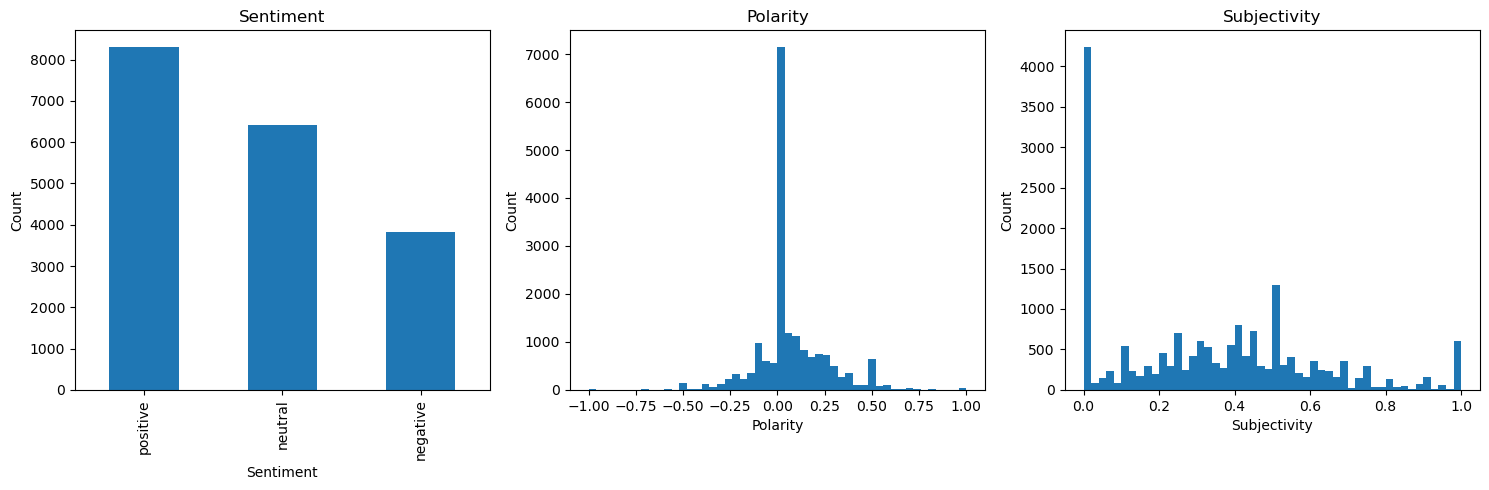

In [11]:
columns_to_plot = ["sentiment", "polarity", "subjectivity"]

fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(5 * len(columns_to_plot), 5))

for i, column in enumerate(columns_to_plot):
    ax = axes[i] 
    if pd.api.types.is_numeric_dtype(df_tweets[column]):
        df_tweets[column].plot.hist(ax=ax, bins=50)
    else:
        df_tweets[column].value_counts().plot.bar(ax=ax)
    ax.set_title(column.capitalize())
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

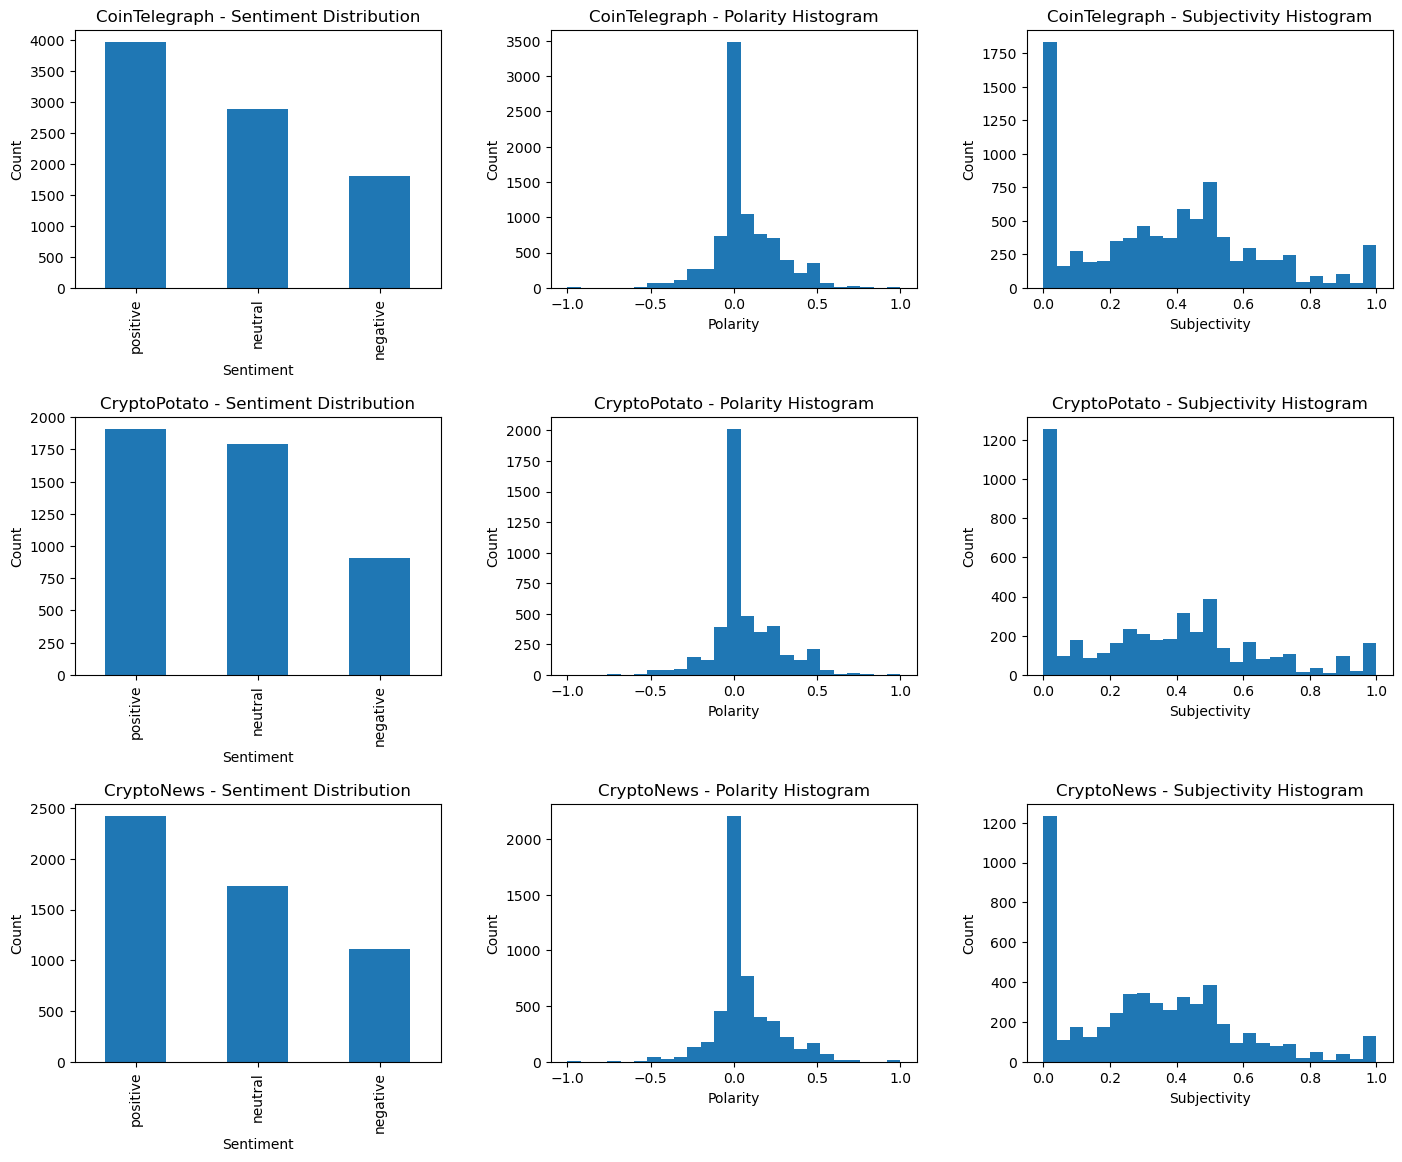

In [12]:
unique_sources = df_tweets["source"].unique()
n_rows = len(unique_sources) # Number of Sources
n_columns = len(columns_to_plot) # Number of columns to analyse

fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, 4 * n_columns))
fig.tight_layout(pad=5)

for i, source in enumerate(unique_sources):
    source_data = df_tweets[df_tweets["source"] == source]

    for j, column in enumerate(columns_to_plot):
        ax = axes[i, j] if n_rows > 1 else axes[j]

        if pd.api.types.is_numeric_dtype(source_data[column]):
            source_data[column].plot.hist(ax=ax, bins=25)
            ax.set_title(f'{source} - {column.capitalize()} Histogram')
            ax.set_ylabel('Count')
            ax.set_xlabel(column.capitalize())
        else:
            # Plot categorical columns as bar charts
            source_data[column].value_counts().plot.bar(ax=ax)
            ax.set_title(f'{source} - {column.capitalize()} Distribution')
            ax.set_ylabel('Count')
            ax.set_xlabel(column.capitalize())

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()